# SMART HOME LOCATION SELECTOR

### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading and Initial Inspection

In [5]:
df = pd.read_csv("../data/smart_home_location_dataset_20000.csv")

In [6]:
df.shape

(19998, 23)

In [7]:
df.head()

,city,locality,zone,latitude,longitude,price_per_sqft,monthly_rent,maintenance_cost,safety_score,crime_rate,...,school_distance_km,college_distance_km,metro_distance_km,bus_stop_distance_km,road_connectivity_score,green_space_score,shopping_mall_distance_km,internet_speed_mbps,water_availability_score,power_backup
0,Bengaluru,Indiranagar,North,24.5907,74.5612,6786,31434,5967,6.8,2.9,...,2.83,4.37,3.99,1.08,7.5,6.5,2.03,282,6.0,Yes
1,Bengaluru,BTM Layout,East,17.2182,74.3364,10014,31396,2259,7.6,2.6,...,3.36,4.22,5.36,0.63,7.9,8.2,3.90,280,7.3,Yes
2,Bengaluru,Indiranagar,North,23.3141,78.5753,5807,48512,2327,7.6,3.0,...,3.11,5.21,3.82,0.20,8.2,6.9,1.85,178,7.3,No
3,Bengaluru,Electronic City,South,23.6854,79.1057,5416,48021,1762,8.9,2.8,...,3.98,2.89,3.67,0.65,9.2,6.6,1.96,123,8.6,No
4,Bengaluru,Yelahanka,Central,19.6121,77.1349,10430,46746,2633,8.0,1.4,...,0.97,5.08,3.36,0.64,8.1,6.6,1.88,201,9.0,Yes


In [8]:
df.columns

Index(['city', 'locality', 'zone', 'latitude', 'longitude', 'price_per_sqft',
       'monthly_rent', 'maintenance_cost', 'safety_score', 'crime_rate',
       'pollution_index', 'noise_level', 'hospital_distance_km',
       'school_distance_km', 'college_distance_km', 'metro_distance_km',
       'bus_stop_distance_km', 'road_connectivity_score', 'green_space_score',
       'shopping_mall_distance_km', 'internet_speed_mbps',
       'water_availability_score', 'power_backup'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       19998 non-null  object 
 1   locality                   19998 non-null  object 
 2   zone                       19998 non-null  object 
 3   latitude                   19998 non-null  float64
 4   longitude                  19998 non-null  float64
 5   price_per_sqft             19998 non-null  int64  
 6   monthly_rent               19998 non-null  int64  
 7   maintenance_cost           19998 non-null  int64  
 8   safety_score               19998 non-null  float64
 9   crime_rate                 19998 non-null  float64
 10  pollution_index            19998 non-null  int64  
 11  noise_level                19998 non-null  float64
 12  hospital_distance_km       19998 non-null  float64
 13  school_distance_km         19998 non-null  flo

In [10]:
df.describe()

,latitude,longitude,price_per_sqft,monthly_rent,maintenance_cost,safety_score,crime_rate,pollution_index,noise_level,hospital_distance_km,school_distance_km,college_distance_km,metro_distance_km,bus_stop_distance_km,road_connectivity_score,green_space_score,shopping_mall_distance_km,internet_speed_mbps,water_availability_score
count,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000
mean,20.717130,76.498997,10230.729773,53883.361736,3999.261726,8.005631,3.250300,189.742574,5.257081,3.250701,2.396819,3.998107,2.844005,0.795592,7.734813,6.741164,3.239897,180.011951,7.745200
std,4.608973,2.197002,3319.311399,20826.662049,1446.207306,0.862387,1.304463,40.676972,1.300032,1.586452,1.206816,1.730123,1.531752,0.404469,1.010922,1.298034,1.592542,69.575453,1.015206
min,12.800600,72.700200,4500.000000,18001.000000,1500.000000,6.500000,1.000000,120.000000,3.000000,0.500000,0.300000,1.000000,0.200000,0.100000,6.000000,4.500000,0.500000,60.000000,6.000000
25%,16.726550,74.586500,7341.250000,35877.500000,2734.000000,7.300000,2.100000,154.000000,4.100000,1.880000,1.360000,2.510000,1.520000,0.450000,6.900000,5.600000,1.840000,120.000000,6.900000
50%,20.685700,76.497650,10228.000000,53551.000000,3993.000000,8.000000,3.200000,190.000000,5.300000,3.270000,2.410000,4.000000,2.850000,0.790000,7.700000,6.700000,3.230000,180.000000,7.700000
75%,24.692075,78.408550,13080.000000,71946.250000,5251.750000,8.700000,4.400000,225.000000,6.400000,4.610000,3.430000,5.500000,4.180000,1.140000,8.600000,7.900000,4.620000,240.000000,8.600000
max,28.699100,80.300000,15999.000000,89999.000000,6500.000000,9.500000,5.500000,260.000000,7.500000,6.000000,4.500000,7.000000,5.500000,1.500000,9.500000,9.000000,6.000000,300.000000,9.500000


### Feature Understanding and Classification

In [12]:
categorical_features = [
    "city",
    "locality",
    "zone",
    "power_backup"
]

categorical_features

['city', 'locality', 'zone', 'power_backup']

In [13]:
numerical_features = [
    "latitude",
    "longitude",
    "price_per_sqft",
    "monthly_rent",
    "maintenance_cost",
    "safety_score",
    "crime_rate",
    "pollution_index",
    "noise_level",
    "hospital_distance_km",
    "school_distance_km",
    "college_distance_km",
    "metro_distance_km",
    "bus_stop_distance_km",
    "road_connectivity_score",
    "green_space_score",
    "shopping_mall_distance_km",
    "internet_speed_mbps",
    "water_availability_score"
]

numerical_features

['latitude',
 'longitude',
 'price_per_sqft',
 'monthly_rent',
 'maintenance_cost',
 'safety_score',
 'crime_rate',
 'pollution_index',
 'noise_level',
 'hospital_distance_km',
 'school_distance_km',
 'college_distance_km',
 'metro_distance_km',
 'bus_stop_distance_km',
 'road_connectivity_score',
 'green_space_score',
 'shopping_mall_distance_km',
 'internet_speed_mbps',
 'water_availability_score']

In [14]:
positive_features = [
    "safety_score",
    "road_connectivity_score",
    "green_space_score",
    "internet_speed_mbps",
    "water_availability_score"
]

In [15]:
negative_features = [
    "price_per_sqft",
    "monthly_rent",
    "maintenance_cost",
    "pollution_index",
    "noise_level",
    "crime_rate",
    "hospital_distance_km",
    "school_distance_km",
    "college_distance_km",
    "metro_distance_km",
    "bus_stop_distance_km",
    "shopping_mall_distance_km"
]

In [16]:
df.isnull().sum()

city                         0
locality                     0
zone                         0
latitude                     0
longitude                    0
price_per_sqft               0
monthly_rent                 0
maintenance_cost             0
safety_score                 0
crime_rate                   0
pollution_index              0
noise_level                  0
hospital_distance_km         0
school_distance_km           0
college_distance_km          0
metro_distance_km            0
bus_stop_distance_km         0
road_connectivity_score      0
green_space_score            0
shopping_mall_distance_km    0
internet_speed_mbps          0
water_availability_score     0
power_backup                 0
dtype: int64

### Data Preprocessing

In [18]:
df["power_backup"] = df["power_backup"].map({"Yes": 1, "No": 0})

In [19]:
df_encoded = pd.get_dummies(
    df,
    columns=["city", "zone"],
    drop_first=True
)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numerical_features] = scaler.fit_transform(
    df_encoded[numerical_features]
)

In [21]:
df_encoded.head()

,locality,latitude,longitude,price_per_sqft,monthly_rent,maintenance_cost,safety_score,crime_rate,pollution_index,noise_level,...,power_backup,city_Chennai,city_Delhi NCR,city_Hyderabad,city_Mumbai,city_Pune,zone_East,zone_North,zone_South,zone_West
0,Indiranagar,0.741586,0.244875,0.198800,0.186575,0.8934,0.100000,0.422222,0.050000,0.088889,...,1,False,False,False,False,False,False,True,False,False
1,BTM Layout,0.277863,0.215295,0.479520,0.186047,0.1518,0.366667,0.355556,0.628571,0.600000,...,1,False,False,False,False,False,True,False,False,False
2,Indiranagar,0.661289,0.773060,0.113662,0.423776,0.1654,0.366667,0.444444,0.664286,0.155556,...,0,False,False,False,False,False,False,True,False,False
3,Electronic City,0.684643,0.842851,0.079659,0.416956,0.0524,0.800000,0.400000,0.114286,0.200000,...,0,False,False,False,False,False,False,False,True,False
4,Yelahanka,0.428437,0.583529,0.515697,0.399247,0.2266,0.500000,0.088889,0.085714,0.866667,...,1,False,False,False,False,False,False,False,False,False


In [22]:
df_processed = df_encoded.copy()

### Target Variable Creation for Machine Learning

In [24]:
df_ml = df_processed.copy()

df_ml["suitability_score"] = (
    0.25 * df_ml["safety_score"] +
    0.20 * df_ml["green_space_score"] +
    0.20 * df_ml["internet_speed_mbps"] +
    0.15 * (1 - df_ml["pollution_index"]) +
    0.20 * (1 - df_ml["metro_distance_km"])
)

In [44]:
df_ml[["suitability_score"]].describe()

,suitability_score
count,19998.000000
mean,0.500589
std,0.130359
min,0.079837
25%,0.408704
50%,0.500042
75%,0.590688
max,0.935727


In [46]:
df_ml.shape

(19998, 31)

### Train–Test Split

In [49]:
X = df_ml.drop(columns=["suitability_score", "locality"])
y = df_ml["suitability_score"]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [53]:
X_train.shape, X_test.shape

((15998, 29), (4000, 29))

### Machine Learning Model Training

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [60]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
rf_model

RandomForestRegressor(n_jobs=-1, random_state=42)

### Model Evaluation

In [65]:
y_pred = rf_model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error

In [69]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae

(0.9760143067959167, 0.01596534436582809)

### Feature Importance Analysis

In [72]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)

safety_score            0.302427
internet_speed_mbps     0.198170
metro_distance_km       0.186786
green_space_score       0.183173
pollution_index         0.103617
monthly_rent            0.001827
longitude               0.001805
hospital_distance_km    0.001795
price_per_sqft          0.001787
maintenance_cost        0.001783
dtype: float64

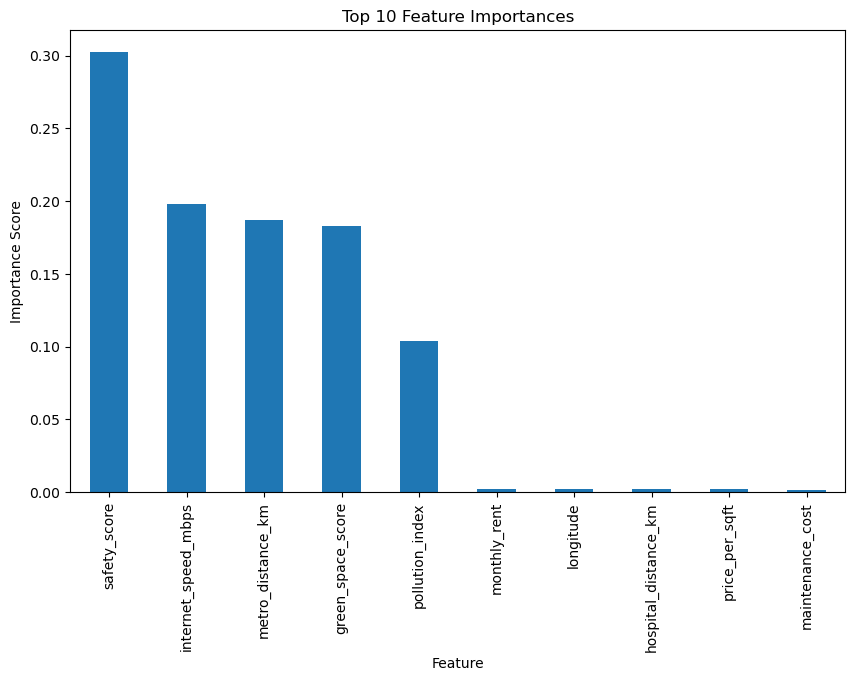

In [74]:
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()

### Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [81]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='r2')

In [85]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [87]:
best_rf_model = grid_search.best_estimator_

In [89]:
y_pred_tuned = best_rf_model.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

r2_tuned, mae_tuned

(0.9764748837603697, 0.015806258579102894)